In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import f

import matplotlib.pyplot as plt

In [3]:
first_set = pd.read_csv("dataset1.csv")

In [4]:
first_set.head()

,user,time,menu
0,1,2.53,toolglass
1,2,2.10,toolglass
2,3,3.05,toolglass
3,4,2.32,toolglass
4,5,2.38,toolglass


# Part-1

## Comparing sample distributions of time-values of different menu

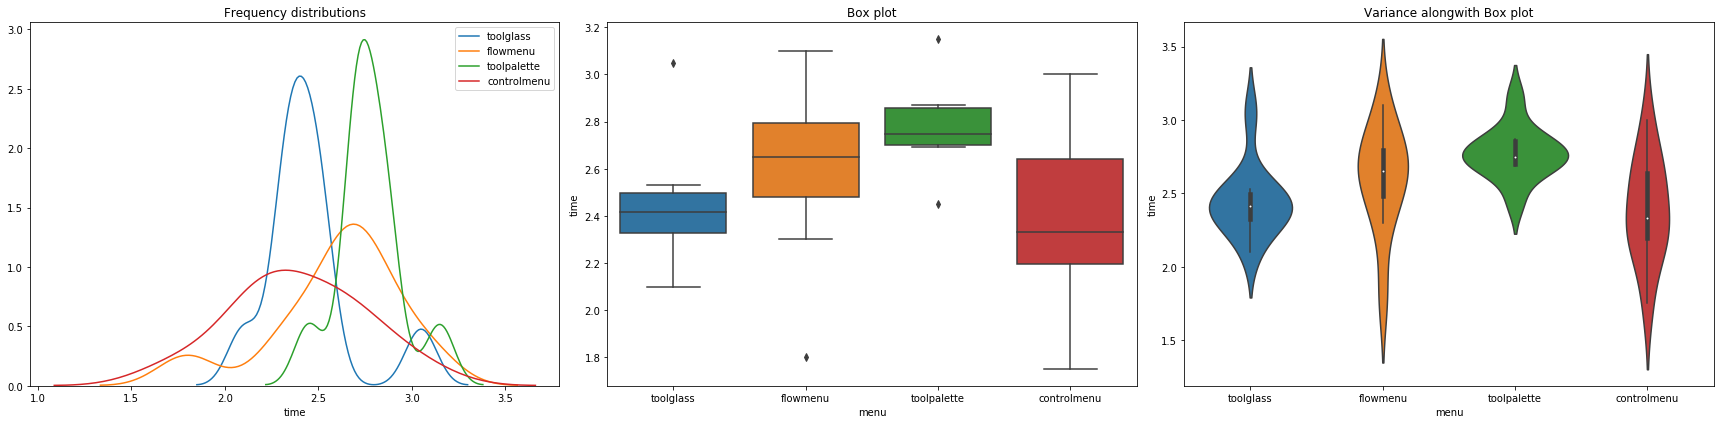

In [5]:
figures, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

sns.distplot(first_set[first_set["menu"]=="toolglass"]["time"], label="toolglass", hist=False, ax=axes[0])
sns.distplot(first_set[first_set["menu"]=="flowmenu"]["time"], label="flowmenu", hist=False, ax=axes[0])
sns.distplot(first_set[first_set["menu"]=="toolpalette"]["time"], label="toolpalette", hist=False, ax=axes[0])
sns.distplot(first_set[first_set["menu"]=="controlmenu"]["time"], label="controlmenu", hist=False, ax=axes[0])

axes[0].set_title("Frequency distributions")

sns.boxplot(x="menu", y="time", data=first_set, ax=axes[1])
axes[1].set_title("Box plot")

sns.violinplot(x="menu", y="time", data=first_set, ax=axes[2])
axes[2].set_title("Variance alongwith Box plot")

# plt.tight_layout()


plt.savefig("")
plt.tight_layout()

## Insight:
1. The toolglass menu and toolpalette menu appear to show similar performance in terms of time, as their frequency distributions appear similar
2. It is clear from box-plot that time-response variable is not same among each menu
3. The highest variance within each group is shown by flowmenu, controlmenu followed by toolglass and toolpalette

## ANOVA

## Observe residual squares for each menu
The residuals are another measure to indicate how far are the samples from the means of their corresponding group </br>
Residual squares within group is used to calculate the denominator of F-Statistic in case of ANOVA </br>
This is another measure to represent variance within the menus

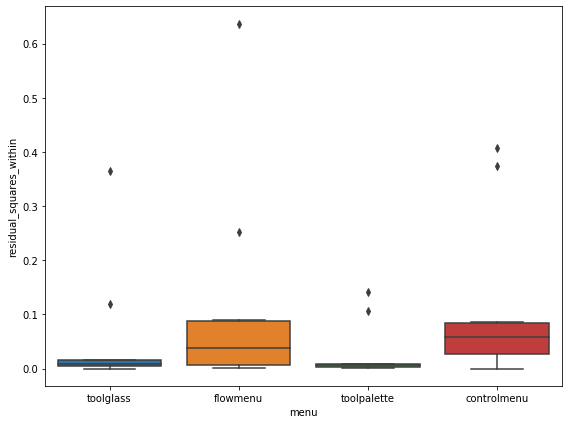

In [6]:
figures, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
toolglass = first_set[first_set["menu"] == "toolglass"]
square_residuals_within_toolglass = np.square(toolglass["time"].values - toolglass["time"].mean())

flowmenu = first_set[first_set["menu"] == "flowmenu"]
square_residuals_within_flowmenu = np.square(flowmenu["time"].values - flowmenu["time"].mean())

toolpalette = first_set[first_set["menu"] == "toolpalette"]
square_residuals_within_toolpalette = np.square(toolpalette["time"].values - toolpalette["time"].mean())

controlmenu = first_set[first_set["menu"] == "controlmenu"]
square_residuals_within_controlmenu = np.square(controlmenu["time"].values - controlmenu["time"].mean())

residual_squares = list(square_residuals_within_toolglass) + list(square_residuals_within_flowmenu) + list(square_residuals_within_toolpalette) + list(square_residuals_within_controlmenu)
    
first_set["residual_squares_within"] = np.array(residual_squares)
sns.boxplot(x="menu", y="residual_squares_within", data=first_set, ax=axes)
plt.tight_layout()
plt.savefig("residuals_within_each_group.jpg")

## Insight
There is a little variation within each group, the residual value of each test-sample is not far from the mean of its corresponding menu-group

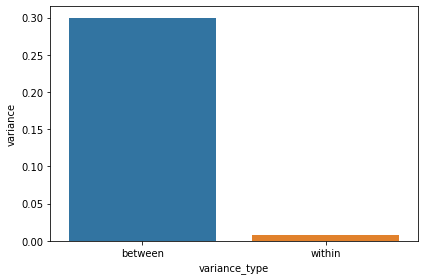

In [7]:
sum_of_squares_between = 0.8998
df_between = 3
sum_of_squares_within = 0.29992
df_within = 36

variance_between = sum_of_squares_between/df_between
variance_within = sum_of_squares_within/df_within

sns.barplot(x="variance_type", y="variance", data=pd.DataFrame({"variance_type": ["between", "within"], "variance": [variance_between, variance_within]}))
plt.tight_layout()
plt.savefig("anova_variances.jpg")

# Part 2

In [7]:
second_set = pd.read_csv("dataset2.csv")

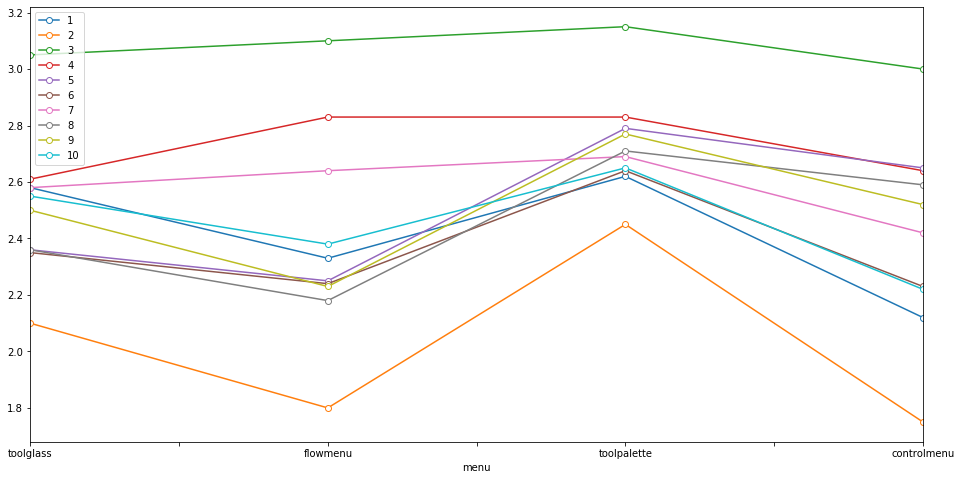

In [68]:
fig, ax = plt.subplots(figsize=(16,8))
second_set.groupby("user").plot(x="menu", y="time", marker="o", markerfacecolor="w", ax=ax)
ax.legend([str(i) for i in range(1, 11)])
plt.savefig("paired_users_time_responses")

## Insight:
1. Generally all users take less time to use controlmenu (shown by the dip at controlmenu for all users)
2. Most time to operate is observed for toolpalette (shown by the peak at toolpalette for all users)

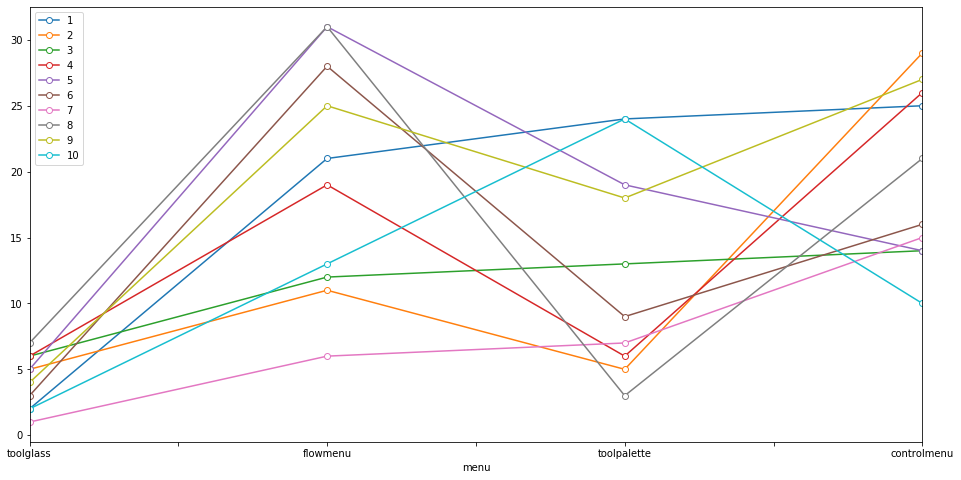

In [69]:
fig, ax = plt.subplots(figsize=(16,8))
second_set.groupby("user").plot(x="menu", y="error", marker="o", markerfacecolor="w", ax=ax)
ax.legend([str(i) for i in range(1, 11)])
plt.savefig("paired_user_error_responses")

## Insight:
1. Generally all users face least errors in case of toolglass menu
2. For most errors there's high variance between menus, hence we cannot for sure inform which menu takes least error without one-sided pairwise t-test

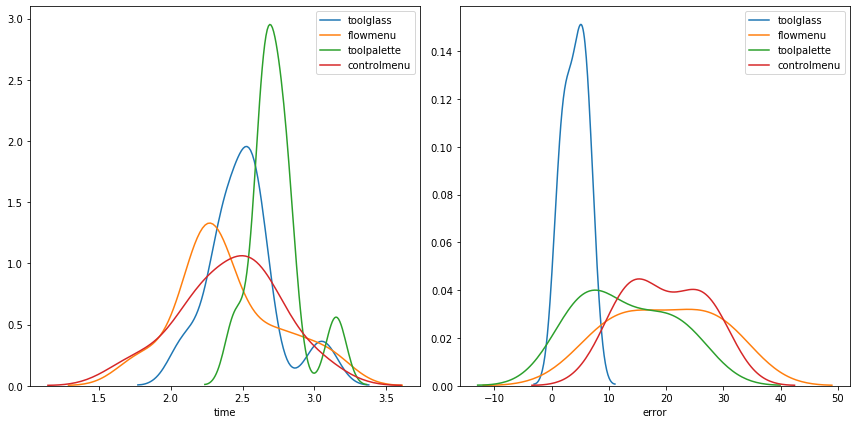

In [13]:
figures, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.distplot(second_set[second_set["menu"]=="toolglass"]["time"], label="toolglass", hist=False, ax=axes[0])
sns.distplot(second_set[second_set["menu"]=="flowmenu"]["time"], label="flowmenu", hist=False, ax=axes[0])
sns.distplot(second_set[second_set["menu"]=="toolpalette"]["time"], label="toolpalette", hist=False, ax=axes[0])
sns.distplot(second_set[second_set["menu"]=="controlmenu"]["time"], label="controlmenu", hist=False, ax=axes[0])

sns.distplot(second_set[second_set["menu"]=="toolglass"]["error"], label="toolglass", hist=False, ax=axes[1])
sns.distplot(second_set[second_set["menu"]=="flowmenu"]["error"], label="flowmenu", hist=False, ax=axes[1])
sns.distplot(second_set[second_set["menu"]=="toolpalette"]["error"], label="toolpalette", hist=False, ax=axes[1])
sns.distplot(second_set[second_set["menu"]=="controlmenu"]["error"], label="controlmenu", hist=False, ax=axes[1])


plt.tight_layout()

## Insight:
1. Toolpalette appears to be different than other menus when we consider time-frequency distribution (In general toolpalette may take time more to operate than other kinds of menus)
2. Toolglass menu in general indicate that it takes lower error to operate than other kinds of menus

## Box-Plot and Violin-Plot in terms of Error

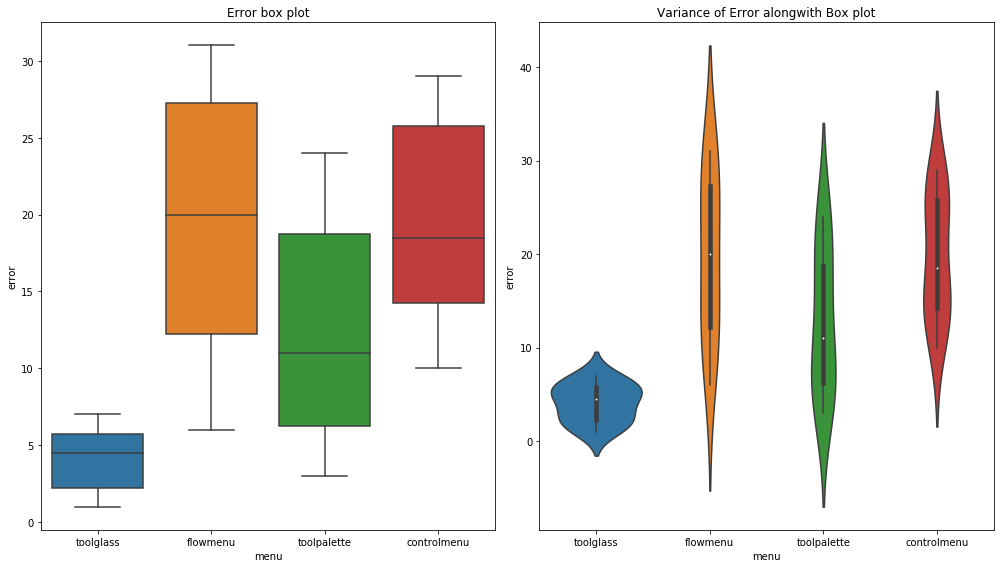

In [14]:
figures, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 8))
sns.boxplot(x="menu", y="error", data=second_set, ax=axes[0])
axes[0].set_title("Error box plot")

sns.violinplot(x="menu", y="error", data=second_set, ax=axes[1])
axes[1].set_title("Variance of Error alongwith Box plot")

plt.tight_layout()

## Insight
1. From the boxplot, it becomes obvious that toolglass menu appears to be having least amount of errors than other menus
2. The variance or spread in the sample of errors is highest among flowmenu, toolpalette and controlmenu errors

## Box-Plot and Violin Plot in terms of time

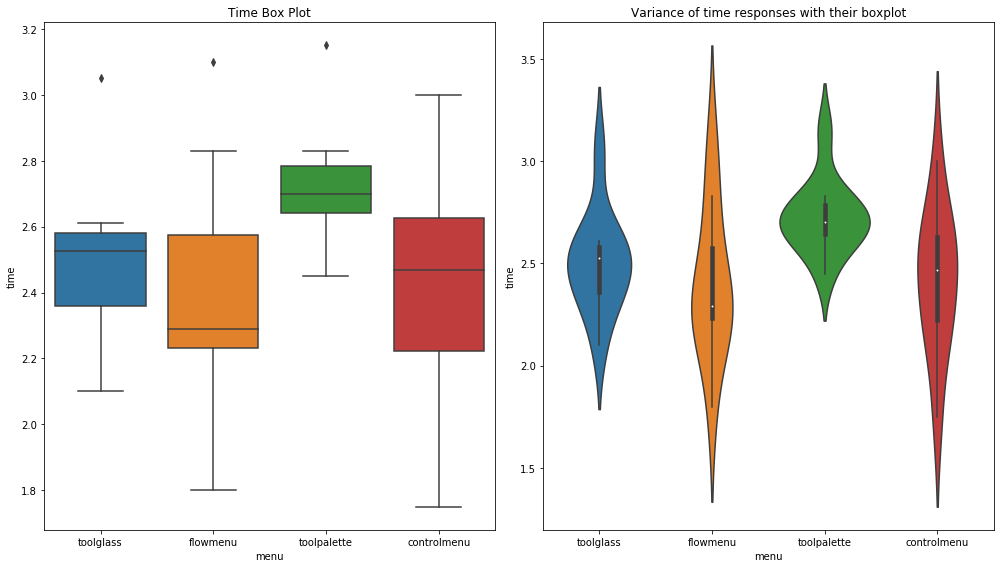

In [70]:
figures, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 8))
sns.boxplot(x="menu", y="time", data=second_set, ax=axes[0])
axes[0].set_title("Time Box Plot")

sns.violinplot(x="menu", y="time", data=second_set, ax=axes[1])
axes[1].set_title("Variance of time responses with their boxplot")

plt.tight_layout()

## Insight:
1. The time taken by users for toolglass and toolpalette menus are of similar ranges and variance
2. The time taken by users for flowmenu and controlmenu menus are of similar ranges and variance

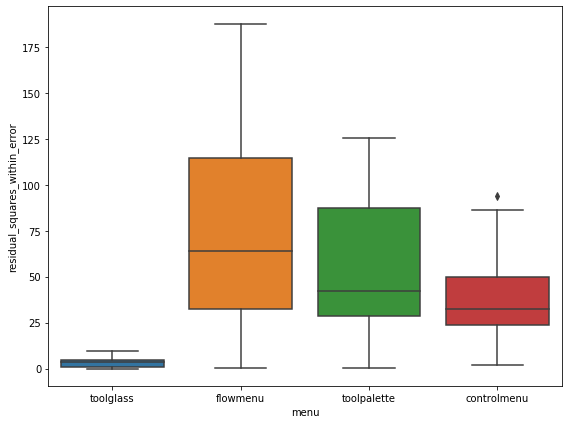

In [18]:
figures, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,6))

toolglass = second_set[second_set["menu"] == "toolglass"]
square_residuals_within_toolglass = np.square(toolglass["error"].values - toolglass["error"].mean())

flowmenu = second_set[second_set["menu"] == "flowmenu"]
square_residuals_within_flowmenu = np.square(flowmenu["error"].values - flowmenu["error"].mean())

toolpalette = second_set[second_set["menu"] == "toolpalette"]
square_residuals_within_toolpalette = np.square(toolpalette["error"].values - toolpalette["error"].mean())

controlmenu = second_set[second_set["menu"] == "controlmenu"]
square_residuals_within_controlmenu = np.square(controlmenu["error"].values - controlmenu["error"].mean())

residual_squares = list(square_residuals_within_toolglass) + list(square_residuals_within_flowmenu) + list(square_residuals_within_toolpalette) + list(square_residuals_within_controlmenu)
    
second_set["residual_squares_within_error"] = np.array(residual_squares)
sns.boxplot(x="menu", y="residual_squares_within_error", data=second_set, ax=axes)
plt.tight_layout()
plt.savefig("second_error_residuals_within_each_group.jpg")

## Insight
1. Toolglass menus shows least amount of error if we just observe the residual squares
2. While computing F-statistic in MANOVA the contribution for residuals square within group by toolglass (error) menu is least

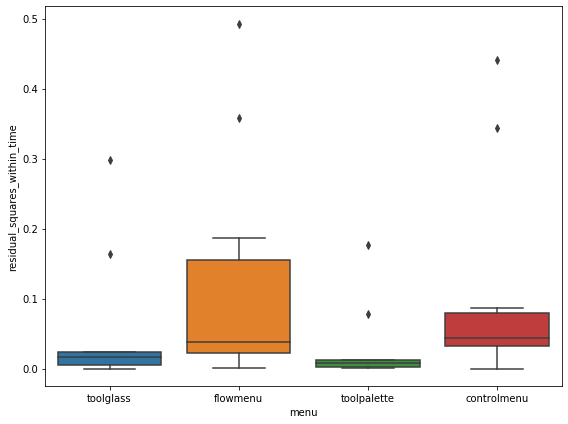

In [19]:
figures, axes = plt.subplots(ncols=1, nrows=1, figsize=(8,6))

toolglass = second_set[second_set["menu"] == "toolglass"]
square_residuals_within_toolglass = np.square(toolglass["time"].values - toolglass["time"].mean())

flowmenu = second_set[second_set["menu"] == "flowmenu"]
square_residuals_within_flowmenu = np.square(flowmenu["time"].values - flowmenu["time"].mean())

toolpalette = second_set[second_set["menu"] == "toolpalette"]
square_residuals_within_toolpalette = np.square(toolpalette["time"].values - toolpalette["time"].mean())

controlmenu = second_set[second_set["menu"] == "controlmenu"]
square_residuals_within_controlmenu = np.square(controlmenu["time"].values - controlmenu["time"].mean())

residual_squares = list(square_residuals_within_toolglass) + list(square_residuals_within_flowmenu) + list(square_residuals_within_toolpalette) + list(square_residuals_within_controlmenu)
    
second_set["residual_squares_within_time"] = np.array(residual_squares)
sns.boxplot(x="menu", y="residual_squares_within_time", data=second_set, ax=axes)
plt.tight_layout()
plt.savefig("second_time_residuals_within_each_group.jpg")

## Insight
1. Toolpalette menus shows least amount of time if we just observe the residual squares
2. While computing F-statistic in MANOVA the contribution for residuals square within group by toolpalette(time) menu is least